### PERFORMING A QUICK ANALYSIS ON THE USA BIRTH RATE DATA provided by the Centers for Disease Control (CDC) 

In [1]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
#loading the dataframe
birth_df = pd.read_csv("births.csv")

In [3]:
#reading a section of the dataframe
print(birth_df.head())

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [4]:
#creating a decade column in the dataframe to show which decade each birth occurs
birth_df['decade'] = (birth_df['year'] // 10) * 10
print(birth_df.head())

   year  month  day gender  births  decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960


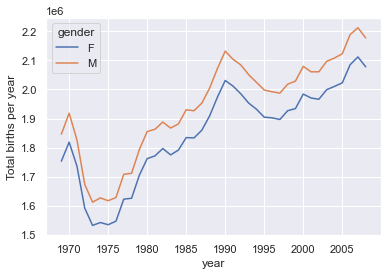

In [5]:
#checking the birth ratio in each year of the male and female gender
birth_yr = birth_df.pivot_table('births', index='year', columns='gender', aggfunc='sum')
birth_yr.plot()
plt.ylabel("Total births per year") 
plt.show()

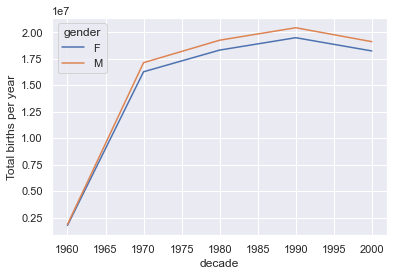

In [6]:
#checking the birth ratio in each decade of the male and female gender
birth_dr = birth_df.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
birth_dr.plot()
plt.ylabel("Total births per year") 
plt.show()

### we can then clearly see the inference drawn from the dataset, illustrating the ascension and decline in births rate in both gender over years and decades respective 

# LET'S PROCEED WITH FURTHER ANALYSIS

### To begin, it is important that we clean the data a bit, removing outliers caused by mistyped dates or missing values. One easy way to remove these all at once is to cut outliers, we’ll do this via a robust sigma-clipping operation: 

In [7]:
quartiles = np.percentile(birth_df['births'], [25, 50, 75])
fq = quartiles[1]
r_est = 0.74 * (quartiles[2] - quartiles[0])
# This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution. 
# With this we can use the query() method to filter out rows with births outside these values:

In [8]:
birth_df = birth_df.query('(births > @fq - 5 * @r_est) & (births < @fq + 5 * @r_est)')
birth_df['day'] = birth_df['day'].astype(int)
birth_df.index = pd.to_datetime(10000 * birth_df.year +
                              100 * birth_df.month +
                              birth_df.day, format='%Y%m%d')

birth_df['dayofweek'] = birth_df.index.dayofweek

/var/folders/r3/h7dct_014m789znt5mq1t4g00000gn/T/ipykernel_4317/3373744104.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


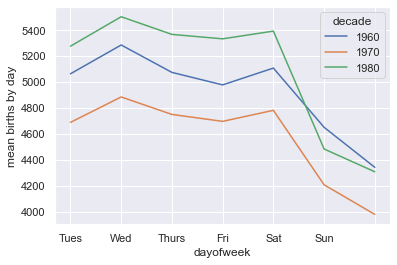

In [9]:
#let's plot births by weekday for several decades
birth_df.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

### from the above analysis, we could see that there are lesser births happening during weekends, compared with weekdays

In [10]:
#Let's proceed to plot the mean number of births by the date of the year.
#Let’s first group the data by month and day separately

births_month = birth_df.pivot_table('births', [birth_df.index.month, birth_df.index.day])
#print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


/var/folders/r3/h7dct_014m789znt5mq1t4g00000gn/T/ipykernel_4317/1501978499.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2012, month, day)


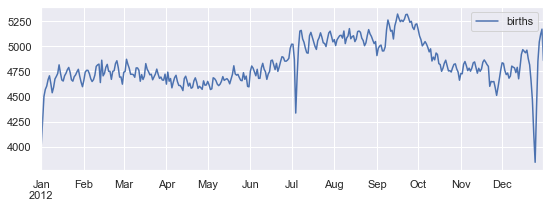

In [11]:
#we now have a time series reflecting the average number of births by date of the year. 
#From this, we can use the plot method to plot the data

fig, ax = plt.subplots(figsize=(9, 3))
births_month.plot(ax=ax)
plt.show()

## THE END 